In [ ]:
# Import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# mounthing google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load data

df = pd.read_csv('/content/drive/MyDrive/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Preliminary Look and Data Cleaning

## Load Sample of Data

In [ ]:
df.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2097,8087-LGYHQ,Male,0,No,No,9,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,94.05,811.65,No
1107,0971-QIFJK,Female,0,Yes,No,69,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),24.25,1641.8,No
3144,7968-QUXNS,Male,0,No,No,6,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,18.95,110.15,No
2691,7629-WIXZF,Female,0,No,No,7,Yes,No,DSL,Yes,...,No,No,No,Yes,One year,Yes,Electronic check,59.10,369.25,No
764,7969-FFOWG,Male,0,Yes,Yes,65,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.90,1292.6,No
5627,9334-GWGOW,Male,1,Yes,No,7,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.85,485.25,No
4625,4480-QQRHC,Female,1,No,No,8,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.05,600.15,No
845,0422-OHQHQ,Female,0,Yes,Yes,15,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.55,295.95,No
4155,6904-JLBGY,Female,1,No,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),117.35,8436.25,No
2309,5414-OFQCB,Male,0,No,No,57,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,No,Two year,Yes,Credit card (automatic),90.45,5229.8,No


## General Information of Data & Missing Values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Treating whitespaces di kolom `TotalCharges`

In [ ]:
# exclude rows with TotalCharges column contains white space
df_telco = df.loc[~df['TotalCharges'].str.contains(' ')]

In [ ]:
# transform TotalCharges col to float
df_telco['TotalCharges'] = df_telco['TotalCharges'].astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_telco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


## Checking Duplicates

In [ ]:
# cek duplicated values

df_telco.duplicated().sum()

0

# Data Understanding

## Statictical Summary

In [ ]:
# group column names based on type

nums = ['SeniorCitizen','tenure','MonthlyCharges','TotalCharges']

cats_demographic = ['customerID', 'gender', 'Partner', 'Dependents'] # data kategorik berdasarkan demografis
cats_service = ['PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies'] # data kategorik berdasarkan service yang digunakan
cats_account = ['Contract','PaperlessBilling','PaymentMethod','Churn'] # data kategorik berdasarkan info akun

### Checking Numberical Collumns

In [ ]:
df_telco[nums].describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


- Kolom `SeniorCitizen` adalah binary/boolean karena hanya memiliki 2 value, yaitu 0 dan 1. Dimana 0 artinya bukan pengguna berusia diatas 65 tahun, dan 1 artinya pengguna di atas 65 tahun.  
- Mean > 50% (mediaan) di `tenure` dan `TotalCharges`, jadi kemungkinan distribusi keduanya sedikit positively skewed. 
- Mean < 50% (median) di `MonthlyCharges` menandakan kolom itu sedikit negatively skewed. 



### Checking Categorical Collumns

In [ ]:
df_telco[cats_demographic].describe()

,customerID,gender,Partner,Dependents
count,7032,7032,7032,7032
unique,7032,2,2,2
top,7590-VHVEG,Male,No,No
freq,1,3549,3639,4933


- `CustomerID` memiliki value yang berbeda-beda karena setiap pengguna memiliki ID yang bebeda juga. 
- `gender`, `Partner`, dan `Dependents` memiliki 2 unique value. Yaitu `Male` dan `Female` untuk `gender`, `Yes` dan `No` untuk kolom `Partner` dan `Dependents`

In [ ]:
df_telco[cats_service].describe()

,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,2,3,3,3,3,3,3,3,3
top,Yes,No,Fiber optic,No,No,No,No,No,No
freq,6352,3385,3096,3497,3087,3094,3472,2809,2781


- Rata-rata unique value yang dimiliki tiap kolom adalah 3. Hanya `PhoneService` yang memiliki 2 unique values. 

In [ ]:
df_telco[cats_account].describe()

,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032
unique,3,2,4,2
top,Month-to-month,Yes,Electronic check,No
freq,3875,4168,2365,5163


- Banyak pengguna yang memilih metode pembayaran elektronik dan menggunakan kontrak bulanan. 

# Univariate Analysis

## Boxplot to Detect Outliers

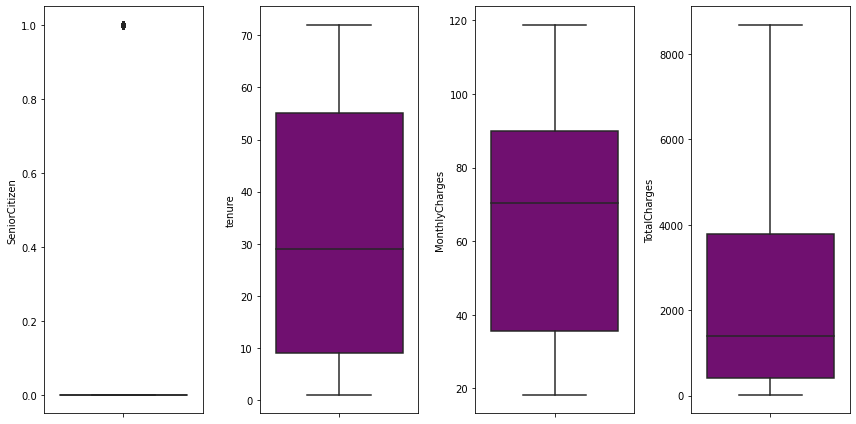

In [ ]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

# plotting
features = nums
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df_telco[features[i]], color='purple')
    plt.tight_layout()

- Tidak ditemukan outliers yang ekstrim di semua kolom numerik

## KDE Plot to check distribution form 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

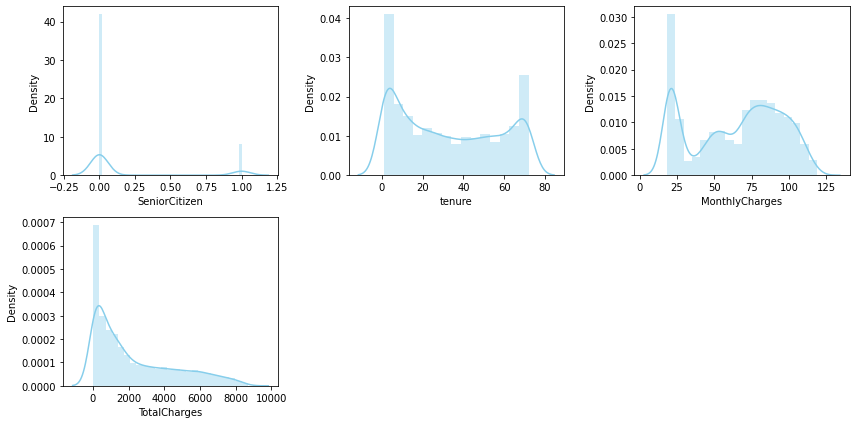

In [ ]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

features = nums
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    #plt.subplot(1, len(features), i+1)
    sns.distplot(x=df_telco[features[i]], color='skyblue')
    plt.xlabel(features[i])
    plt.tight_layout()

- `SeniorCitizen` has boolean value: 0 and 1
- the 3 other collumns are somewhat assymetrical. 
- `tenure` and `MonthlyCharges` have more than 1 maximum point. 

## Countplot for categoricals collumn

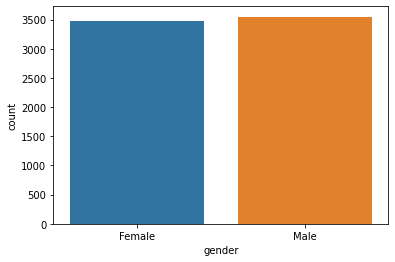

In [ ]:
sns.countplot(data = df_telco , x = 'gender')

- Customer laki-laki sedikit lebih banyak daripada customer perempuan

# Multivariate/Bivariate Analysis

### TechSupport - Churn

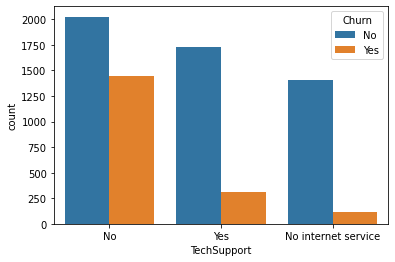

In [ ]:
sns.countplot(data=df_telco,
            x='TechSupport',
            hue='Churn')

- finding: Users who don'y use the Technical support are most likely to churn

### Churn - Gender

Text(0.5, 1.0, 'absolut number')

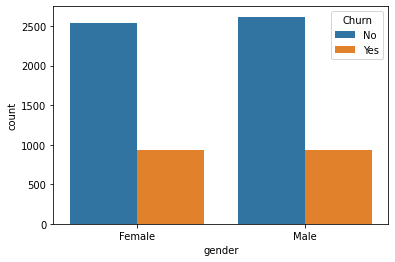

In [ ]:
sns.countplot(data=df_telco,
            x='gender',
            hue='Churn')

- finding: tingkatan churn user laki-laki dan perempuan sama banyak

### Churn - Partner

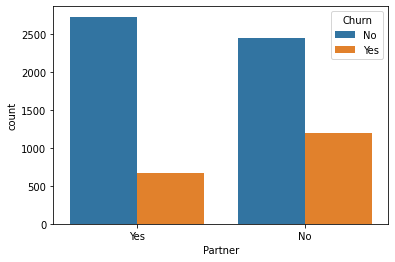

In [ ]:
sns.countplot(data=df_telco,
            x='Partner',
            hue='Churn')

- finding: user yang tidak memiliki partner lebih banyak yang Churn

### Churn - Dependents

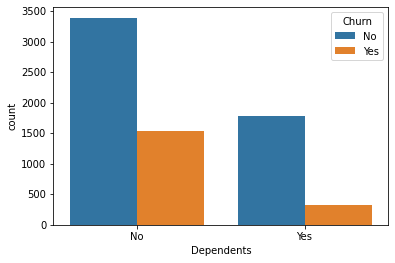

In [ ]:
sns.countplot(data=df_telco,
            x='Dependents',
            hue='Churn')

- finding: user yang tinggal sendiri lebih banyak yang Churn

### Churn - Payment Method 

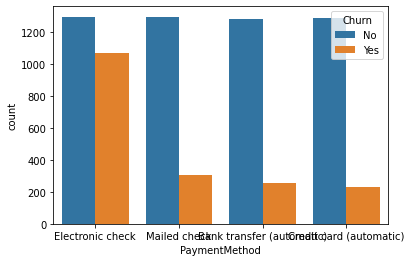

In [ ]:
sns.countplot(data=df_telco,
            x='PaymentMethod',
            hue='Churn')

- finding: user dengan metode pembayaran elektronik paling banyak Churn 

### Churn - Paperless Billing

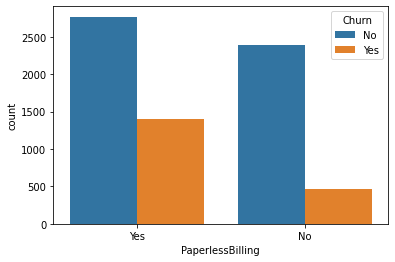

In [ ]:
sns.countplot(data=df_telco,
            x='PaperlessBilling',
            hue='Churn')

- finding: yang memilih paperless billing lebih banyak churn 

### Checking Churn by Services

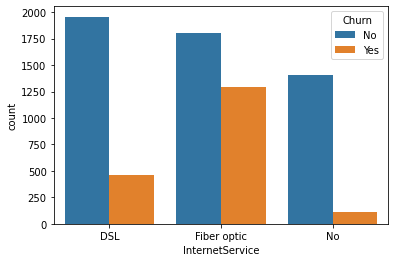

In [ ]:
sns.countplot(data=df_telco,
            x='InternetService',
            hue='Churn')

- finding: user yang menggunakan layanan fiber optik memiliki jumlah churn paling banyak. 
- rekomendasi after EDA: Perusahaan sebaiknya melakukan pengecekan di layanan fiber optik karena banyak pelanggan yang merasa tidak puas dan akhirnya meninggalkan layanan tersebut. 

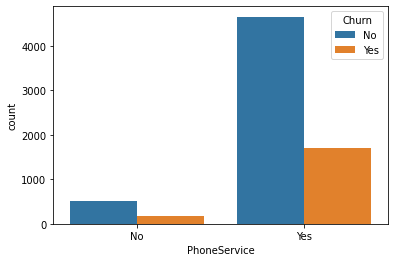

In [ ]:
sns.countplot(data=df_telco,
            x='PhoneService',
            hue='Churn')

- finding: user yang memilih layanan telepon lebih banyak yang Churn, tetapi ini dikarenakan jumlah user yang tidak menggunakan layanan telepon sangat sedikit, bahkan hampir tidak ada. 

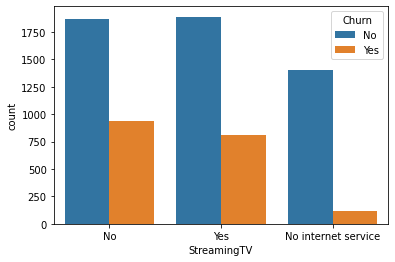

In [ ]:
sns.countplot(data=df_telco,
            x='StreamingTV',
            hue='Churn')

- finding: pengguna streamingtv yang churn dan yang tidak memiliki perbedaan tipis. 

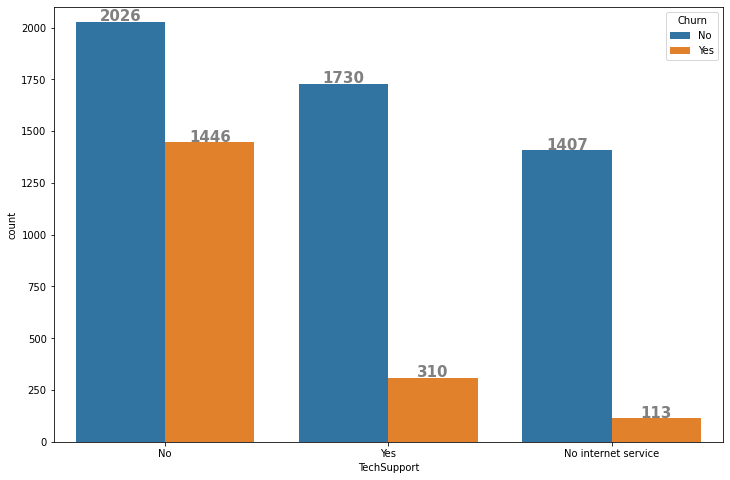

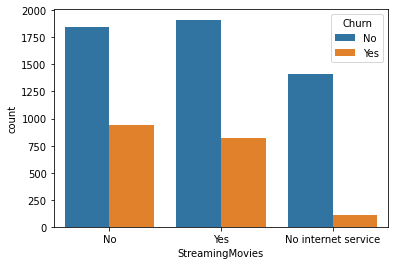

In [ ]:
sns.countplot(data=df_telco,
            x='StreamingMovies',
            hue='Churn')

- finding: pengguna streamingmovies yang churn dan yang tidak memiliki perbedaan tipis.

### Correlation Heatmap

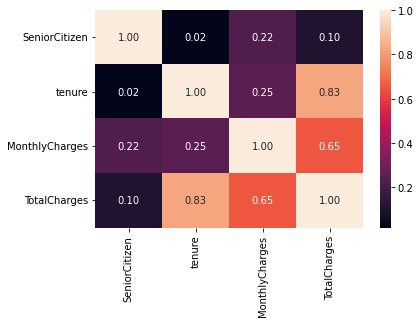

In [ ]:
# correlation heatmap
correlation = df_telco.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

- `tenure` and `TotalCharges` are highly correlated

### Pairplot of the data

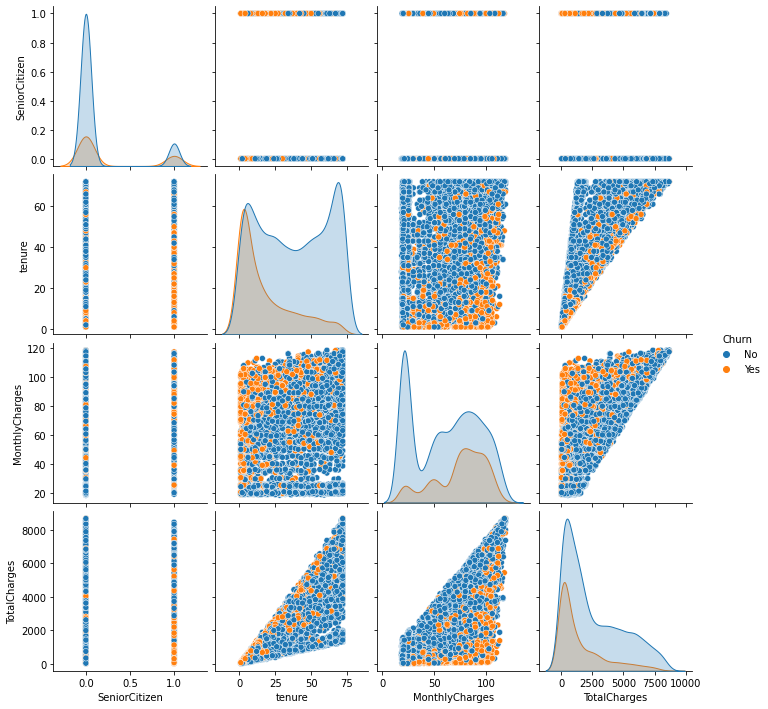

In [ ]:
sns.pairplot(df_telco, hue='Churn')

Finding: ```MonthlyCharges``` ```tenure``` and ```Churn``` are highly correlated

# Perform Deep Dive Question

### 1. Who are top 10 Customers in MonthlyCharges?

In [ ]:
df_telco['MonthlyCharges']

the_top10 = (df_telco
              .groupby('customerID')
              .agg(Total=('MonthlyCharges','sum'))
              .reset_index()
              .sort_values('Total',ascending=False)
              .head(10)
              )

the_top10

,customerID,Total
5350,7569-NMZYQ,118.75
6334,8984-HPEMB,118.65
4057,5734-EJKXG,118.60
4237,5989-AXPUC,118.60
5813,8199-ZLLSA,118.35
6982,9924-JPRMC,118.20
2000,2889-FPWRM,117.80
2680,3810-DVDQQ,117.60
6844,9739-JLPQJ,117.50
1578,2302-ANTDP,117.45


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

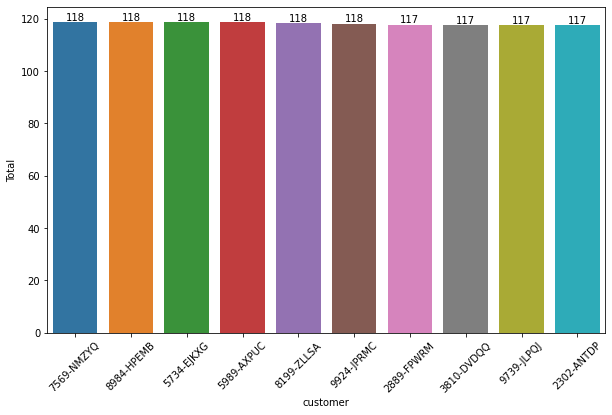

In [ ]:
# Create a bar chart
df = the_top10

fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
ax = sns.barplot(data=df, x='customerID', y='Total')
#ax.set_xticklabels(df['CustomerID'], rotation=90 )
ax.set_xlabel("customer")

rects = ax.patches

# Make some labels.
labels = df['Total'].astype(int)

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height, label, ha="center", va="bottom"
    )

plt.xticks(rotation=45)

finding:
- Top 10 customer in MonthlyCharges berada di angka 117-118

### Berdasarkan tingkatan Churn, metode pembayaran apa yang paling banyak digunakan user yang menggunakan layanan internet? 

In [ ]:
user_churn = (df_telco
                .groupby(['Churn','PaymentMethod','InternetService'])
                .agg(total_user=('customerID','count'))
)
user_churn

total_user
Churn PaymentMethod             InternetService            
No    Bank transfer (automatic) DSL                     511
                                Fiber optic             459
                                No                      314
      Credit card (automatic)   DSL                     521
                                Fiber optic             446
                                No                      322
      Electronic check          DSL                     441
                                Fiber optic             746
                                No                      107
      Mailed check              DSL                     484
                                Fiber optic             148
                                No                      664
Yes   Bank transfer (automatic) DSL                      53
                                Fiber optic             187
                                No                       18
      Credit card (automatic)   DSL                      72
                                Fiber optic             151
                                No                        9
      Electronic check          DSL                     207
                                Fiber optic             849
                                No                       15
      Mailed check              DSL                     127
                                Fiber optic             110
                                No                       71

finding:
- user yang paling banyak meninggalkan layanan (churn) adalah pengguna internet Fiber optik dengan pembayaran elektronik, yaitu sebanyakan 849 orang. 